## Measuring the Variance to Mean Ratio##

In neurons there tends to be a strong linear dependence of the variance on the mean. We would like to measure both the strength of this relationship and the parameters of this relationship as best we can. There are a variety of choices both in analysis and experiment that can be adjusted to optimize the accuracy of this measurement as indexed by the bias and variance. To determine these trade offs requires a model.

One issue is that not all neurons have a linear relationship between their mean and their variance. The model of tria-to-trial variability I have developed only accounts for a linear relationship and thus my interest is focused on those neurons which have a linear variance to mean relationship and thus I need a test for excluding a neuron sensitive to whether it deviates from a linear fit to its sample variances and mean.

Given that it fits then I need a method for best estimating the VMR.


### Analysis###

$\hat{\mu} = $ estimator of mean

$\hat{\sigma}^2= $ estimator of variance 

$\hat{\beta} = $ estimator of the relationship between variance and mean.


### Experiment###
$n = $ number of stimuli

$m = $ number of trials

$d = $ dynamic range of neuron.





### Model###
We can work this out for models of increasing complexity starting with a simple normal model.

$$Y_i \sim N(\mu_i, \beta \mu_i)$$ with $\beta$ and $\mu_i$ unknown and we want to estimate $\beta$

We can take estimators of the mean and the variance:
$$\hat{\mu_i} = \frac{1}{m}\sum_j^m{Y_{ij}}$$
$$\hat{\sigma_i^2} = \frac{1}{m-1}\sum_j^m{(Y_{ij}-\hat{\mu_i})^2}$$

So we have $n+1$ ($\mu_i$ and $\beta$) parameters we need to estimate and $nm$ data points. 

The natural exponential parameters in the case n=1 are ($\frac{1}{\beta}$ , $- \frac{1}{2 \beta \mu}$) which spans a 2-d space which implies that ($\sum_i^m{x_i}$, $\sum_i^m{x_i^2}$) is the minimal sufficient statistic which has one-to-one transformation to $(\bar{x}, s^2)$=($\hat{\mu_i}, \hat{\sigma_i}^2$). Which in turn implies if we can find an unbiased estimator which is a function of these statistics we then have the minimal variance estimator


The distribution of these estimators in this case are:
$$\hat{\mu_i} \sim N(\mu_i, \frac{\beta \mu_i}{m})$$

$$\hat{\sigma_i^2} \sim \beta \mu_i \chi_{m-1}^2 $$

These are independent conditional on their parameters.
One way to estimate $\beta$ is via the coefficient of variation:

$$\frac{s^2}{\bar{x}}$$

Now we want to check whether it is unbiased:

we know that the two statistics are uncorrelated and so $E(\frac{s^2}{\bar{x}}) = E(\frac{s^2}{1})E(\frac{1}{\bar{x}}) = \frac{\beta \mu}{1} E(\frac{1}{\bar{x}})$

unfortunately $E(\frac{1}{\bar{x}})$ does not exist lets simulate and see what happens:

3.9304739066
1041.31885818


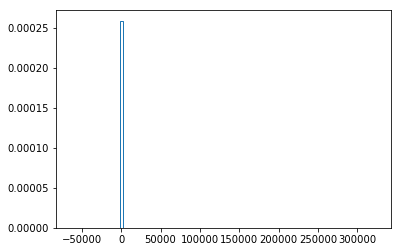

In [315]:
n=5
x = np.random.normal(1,1**0.5,(n,100000))
est = (np.var(x,0, ddof=1)/np.mean(x,0))

plt.hist(est, bins=100, cumulative=False, histtype='step', normed=True);
print(np.mean(est))
print(np.std(est))

#catastrophe for low mean and variance

1.25541927013
92.1700815873


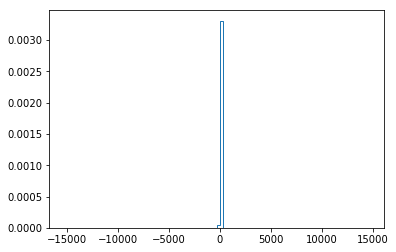

In [316]:
est = np.var(x,0, ddof=1)/np.median(x,0)
plt.hist(est, bins=100, cumulative=False, histtype='step', normed=True);
print(np.mean(est))
print(np.std(est))

Another way to estimate $\beta$ is via linear regression:

Our model is:

$\sigma_i^2 = \beta \mu_i + \epsilon (\beta\mu_i)$


We estimate $\beta$ by solving the equation:

$\hat{\sigma_i^2} = \beta \hat{\mu_i}$

with least squares:

$$\hat{\beta} = \frac{\sum_i^n{[\hat{\sigma_i^2} \hat{\mu_i}]}}{\sum_i^n{[\hat{\mu_i} ]^2}}$$

now to find the approximate distribution of $\hat{\beta}$ we will use the $\delta$ method to do this we need:

$E([\hat{\sigma_i^2} \hat{\mu_i}]) = \beta$

$E([\hat{\mu_i} ]^2)$

$Var([\hat{\sigma_i^2} \hat{\mu_i}])$

$Var([\hat{\mu_i} ]^2)$

and

$Cov([\hat{\sigma_i^2} \hat{\mu_i}], [\hat{\mu_i} ]^2)$


A major problem here is that these are not IID our means and variances are changing. 
And also 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
lambdas.shape

(200,)

(1000, 100)


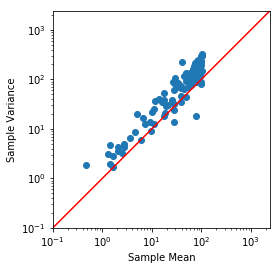

In [320]:
amplitude = 49
base_line = 50
true_r2 = 0.8
n_exps = 1000
vmr = 2
n = 10
m = 100
angle = np.arccos(true_r2**0.5)
#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y = np.random.normal(lambdas, np.sqrt(vmr*lambdas), size=(n_exps, n, m)) # n_experiments n_trials m_stimuli

y_mean = y.mean(1) # average the trials
y_var = y.var(1, ddof=1)
plt.scatter(y_mean[0], y_var[0])
ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.axis('square')
plt.xlim([0.1,base_line*amplitude]);plt.ylim([0.1,base_line*amplitude])
plt.plot([0.1,base_line*amplitude],[0.1,base_line*amplitude], color='r')
plt.xlabel('Sample Mean');plt.ylabel('Sample Variance')
print(y_mean.shape)

In [323]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
slopes = []
exps = []
linslope = []
for i in range(n_exps):
    df = pd.DataFrame(np.array([np.log(y_mean[i]), np.log(y_var[i])]).T, columns=['mean', 'var'])
    mod = (ols('var ~ mean', data=df).fit())
    exps.append(mod.params[1])
    slopes.append(mod.params[0])
    df = pd.DataFrame(np.array([y_mean[i], y_var[i]]).T, columns=['mean', 'var'])
    mod = (ols('var ~ mean -1', data=df).fit())
    linslope.append(mod.params[0])

/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


0.17390354327811311

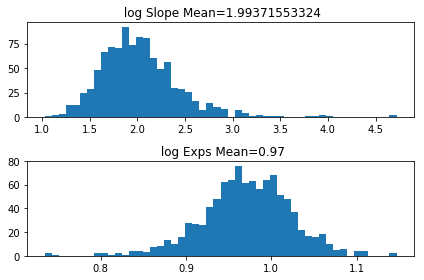

In [324]:
plt.subplot(311)
slopes = np.array(slopes)[~np.isinf(slopes)]
plt.hist(np.exp(slopes), bins=50);
plt.title(' log Slope Mean=' + str(np.exp(np.round(np.mean(slopes),2))))

plt.subplot(312)
exps = np.array(exps)[~np.isinf(slopes)]
plt.hist(exps, bins=50);
plt.title(' log Exps Mean=' + str(np.round(np.mean(exps),2)))
plt.tight_layout()

plt.subplot(312)
exps = np.array(exps)[~np.isinf(slopes)]
plt.hist(exps, bins=50);
plt.title(' log Exps Mean=' + str(np.round(np.mean(exps),2)))
plt.tight_layout()

np.sum((exps - 1)**2)/1000
np.sum((np.exp(slopes) - vmr)**2)/1000

In [201]:
print(mod.summary2())
print(np.exp(-1))

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.829    
Dependent Variable: var              AIC:                1065.9584
Date:               2018-07-06 13:27 BIC:                1068.5635
No. Observations:   100              Log-Likelihood:     -531.98  
Df Model:           1                F-statistic:        484.5    
Df Residuals:       99               Prob (F-statistic): 6.41e-40 
R-squared:          0.830            Scale:              2469.5   
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
mean      1.9036      0.0865    22.0116    0.0000    1.7320    2.0752
------------------------------------------------------------------
Omnibus:              79.698       Durbin-Watson:          2.377  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       666.803


0.098939797030805077

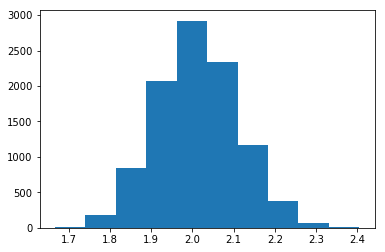

In [194]:
est = (y_var/y_mean).mean(1)
plt.hist(est)
np.sum((est - vmr)**2)/1000


Taking logs:
$log(\sigma_i^2) = log(\beta) + log(\mu_i)$

Here $\beta = \frac{1}{n} \sum_i^n{\log(\sigma_i^2)} - \frac{1}{n} \sum_i^n{\log(\mu_i)}$

Our estimator of $\beta$ will be:

$\hat{\beta} = \frac{1}{n} \sum_i^n{\log(\hat{\sigma_i^2})} - \frac{1}{n} \sum_i^n{\log(\hat{\mu_i})}$